# IMPORT LIBRARY

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.style.use('dark_background')
import warnings
warnings.filterwarnings('ignore')

In [2]:
%%HTML
    <style type="text/css">
        table.dataframe td, table.dataframe th {
            border-style: solid;
        }
</style>

# READ DATA

In [3]:
data = pd.read_csv('DATA/customer_bank_data.csv')
data.head()

,CUSTOMERID,AGE,EDUCATION,YEARSEMPLOYED,INCOME,CARDDEBT,OTHERDEBT,DEFAULTED,ADDRESS
0,1,41,UNDER GRADUATE,6,19,0.124,1.073,0,NBA001
1,2,47,SCHOOL,26,100,4.582,8.218,0,NBA021
2,3,33,UNDER GRADUATE,10,57,6.111,5.802,1,NBA013
3,4,29,UNDER GRADUATE,4,19,0.681,0.516,0,NBA009
4,5,47,SCHOOL,31,253,9.308,8.908,0,NBA008


In [4]:
print('EDUCATION', np.unique(data['EDUCATION']))

EDUCATION ['DOCTRATE' 'POST DOCTORAL RESEARCH' 'POST GRADUATE' 'SCHOOL'
 'UNDER GRADUATE']


# DATA PREPROCESS

In [5]:
data['EDUCATION'] = np.where(data['EDUCATION'] == 'DOCTRATE', '4', data['EDUCATION'])
data['EDUCATION'] = np.where(data['EDUCATION'] == 'POST DOCTORAL RESEARCH', '5', data['EDUCATION'])
data['EDUCATION'] = np.where(data['EDUCATION'] == 'POST GRADUATE', '3', data['EDUCATION'])
data['EDUCATION'] = np.where(data['EDUCATION'] == 'SCHOOL', '1', data['EDUCATION'])
data['EDUCATION'] = np.where(data['EDUCATION'] == 'UNDER GRADUATE', '2', data['EDUCATION'])

In [6]:
print('EDUCATION', np.unique(data['EDUCATION']))

EDUCATION ['1' '2' '3' '4' '5']


In [7]:
data['DEBTINCOMERATIO'] = (data['CARDDEBT'] + data['OTHERDEBT']) / data['INCOME'] * 100

In [8]:
data.head()

,CUSTOMERID,AGE,EDUCATION,YEARSEMPLOYED,INCOME,CARDDEBT,OTHERDEBT,DEFAULTED,ADDRESS,DEBTINCOMERATIO
0,1,41,2,6,19,0.124,1.073,0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0,NBA008,7.2


In [9]:
data['EMPLOY_RATIO'] = data['YEARSEMPLOYED'] / data['AGE']

In [10]:
data.head()

,CUSTOMERID,AGE,EDUCATION,YEARSEMPLOYED,INCOME,CARDDEBT,OTHERDEBT,DEFAULTED,ADDRESS,DEBTINCOMERATIO,EMPLOY_RATIO
0,1,41,2,6,19,0.124,1.073,0,NBA001,6.3,0.146341
1,2,47,1,26,100,4.582,8.218,0,NBA021,12.8,0.553191
2,3,33,2,10,57,6.111,5.802,1,NBA013,20.9,0.303030
3,4,29,2,4,19,0.681,0.516,0,NBA009,6.3,0.137931
4,5,47,1,31,253,9.308,8.908,0,NBA008,7.2,0.659574


In [11]:
data = data[['DEBTINCOMERATIO', 'EMPLOY_RATIO']]
data = data[pd.notnull(data[['DEBTINCOMERATIO', 'EMPLOY_RATIO']])]

In [12]:
data.head()

,DEBTINCOMERATIO,EMPLOY_RATIO
0,6.3,0.146341
1,12.8,0.553191
2,20.9,0.303030
3,6.3,0.137931
4,7.2,0.659574


# CREATE CLUSTER MODEL

In [13]:
inertia_list = []
for k in np.arange(1, 10):
    kmn = KMeans(n_clusters=k)
    kmn.fit(data.values)
    inertia_list.append(kmn.inertia_)
    
inertia_list

[38354.85967436236,
 13022.32101676953,
 6562.608195958314,
 3847.75349640468,
 2648.234536662166,
 1875.2249305786142,
 1307.0127332307336,
 1021.0607501534738,
 806.6560625902988]

# BEST PARAMS SELECTION

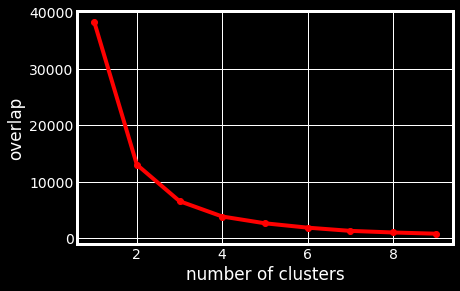

In [14]:
plt.plot(np.arange(1, 10), inertia_list, 'ro-')
plt.xlabel('number of clusters')
plt.ylabel('overlap')
plt.show()

In [15]:
kmn = KMeans(n_clusters=4)
kmn.fit(data.values)
labels = kmn.predict(data.values)

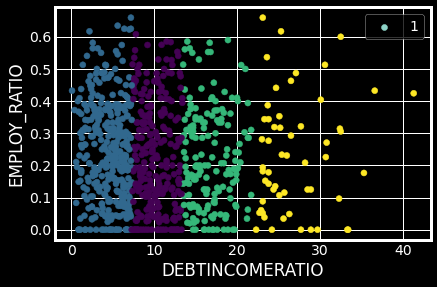

In [16]:
xs = data.values[:,0]
ys = data.values[:, 1]
plt.scatter(xs, ys, c=labels)
plt.legend(labels, loc='upper right')
plt.xlabel('DEBTINCOMERATIO')
plt.ylabel('EMPLOY_RATIO')
plt.show()

In [17]:
columns = ['Cluster']
shahin = pd.DataFrame(labels, index = None, columns=columns)
shahin.head()

,Cluster
0,1
1,0
2,2
3,1
4,1
